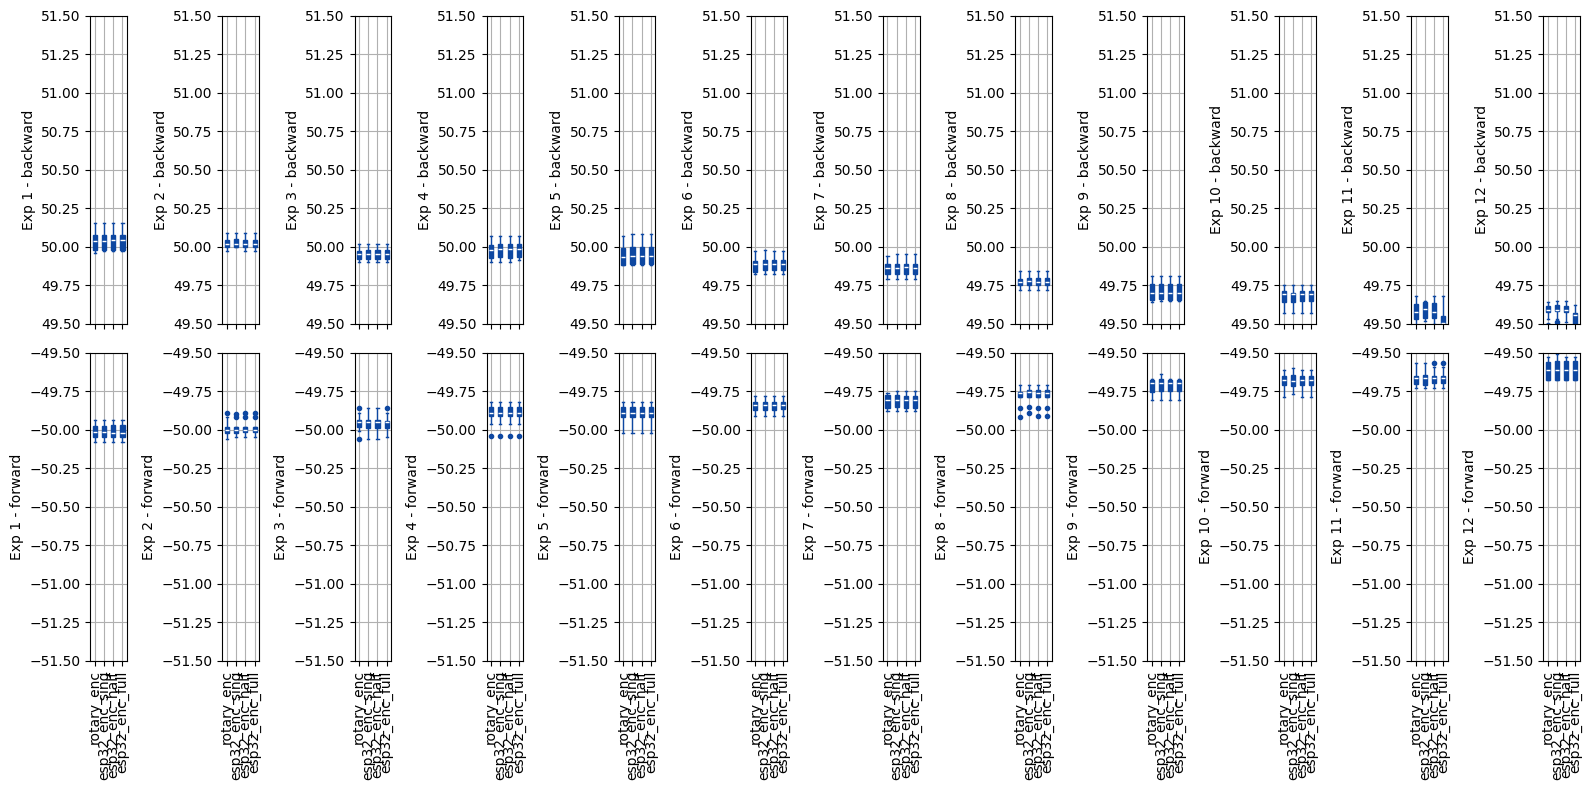

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

# Find all forward and backward CSV files
forward_files = sorted(glob.glob("exp*_forward.csv"))
backward_files = sorted(glob.glob("exp*_backward.csv"))

def load_experiment(files, direction):
    dfs = []
    for f in files:
        df = pd.read_csv(f)
        exp_id = f.split('_')[0][3:]  # Extract id from filename
        df['exp_id'] = exp_id
        df['direction'] = direction
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

# Load data (not melted)
df_forward = load_experiment(forward_files, 'forward')
df_backward = load_experiment(backward_files, 'backward')
df_all = pd.concat([df_forward, df_backward], ignore_index=True)

# Generate boxplots per experiment/direction
methods = [col for col in df_all.columns if col not in ['time', 'exp_id', 'direction']]
exp_dirs = df_all[['exp_id', 'direction']].drop_duplicates()
exp_dirs['exp_id'] = exp_dirs['exp_id'].astype(int)
exp_dirs = exp_dirs.sort_values(['direction', 'exp_id']).reset_index(drop=True)

plt.figure(figsize=(16, 8))
for idx, (exp_id, direction) in enumerate(exp_dirs.values):
    exp_id = str(exp_id)
    plt.subplot(2, (len(exp_dirs)+1)//2, idx+1)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    subset = df_all[(df_all['exp_id'] == exp_id) & (df_all['direction'] == direction)]
    subset[methods].boxplot(
        ax=plt.gca(),
        patch_artist=True,
        boxprops=dict(facecolor='#0d47a1', color='#0d47a1'),
        medianprops=dict(color='white'),
        whiskerprops=dict(color='#0d47a1'),
        capprops=dict(color='#0d47a1'),
        flierprops=dict(marker='o', markersize=3, markerfacecolor='#0d47a1', markeredgecolor='#0d47a1')
    )
    ax = plt.gca()
    if direction == 'backward':
        ax.tick_params(axis='x', labelbottom=False)
    else:
        for label in ax.get_xticklabels():
            label.set_rotation(90)
    plt.ylabel(f'Exp {exp_id} - {direction}')
    if direction == 'backward':
        plt.ylim(49.5, 51.5)
    else:
        plt.ylim(-51.5, -49.5)
plt.tight_layout()
plt.show()


In [ ]:
# Combine forward and backward data, take absolute values, and plot boxplots per experiment
df_all_abs = df_all.copy()
df_all_abs[methods] = df_all_abs[methods].abs()
df_all_abs['exp_id'] = df_all_abs['exp_id'].astype(int)

plt.figure(figsize=(12, 6))
boxplot_data = [df_all_abs[df_all_abs['exp_id'] == exp_id][methods].values for exp_id in exp_ids['exp_id']]
# Flatten each experiment's measurements for boxplot
boxplot_data_flat = [vals.flatten() for vals in boxplot_data]

plt.boxplot(boxplot_data_flat, patch_artist=True,
            boxprops=dict(facecolor='#0d47a1', color='#0d47a1'),
            medianprops=dict(color='white'),
            whiskerprops=dict(color='#0d47a1'),
            capprops=dict(color='#0d47a1'),
            flierprops=dict(marker='o', markersize=3, markerfacecolor='#0d47a1', markeredgecolor='#0d47a1'))

plt.xticks(range(1, len(exp_ids['exp_id'])+1), exp_ids['exp_id'])
plt.xlabel('Experiment ID')
plt.ylabel('Measurement (absolute value)')
plt.title('Boxplots of Measurements per Experiment (Forward & Backward Combined)')
plt.tight_layout()
plt.show()